# K-Means Clustering
## Siva.Jasthi@metrostate.edu
### Machine Learining and Data Mining

In [ ]:
#@title Do the necessary imports
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Define the number of clusters and maximum number of iterations
# These values are applicable for the entire notebook
K = 3
max_iterations = 100

In [ ]:
#@title Other configurations (colors) to maintain the consistency between the plots

# define the fixed list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'orangered', 'black', 'limegreen', 'cyan', 'magenta', 'yellow', 'gold', 'silver', 'navy', 'lime', 'hotpink', 'crimson', 'mediumorchid']

# choose K random colors from the fixed list
random_colors = random.sample(colors, K)

print(random_colors)


['silver', 'hotpink', 'purple']


# K-Means Clustering (Basic Python)

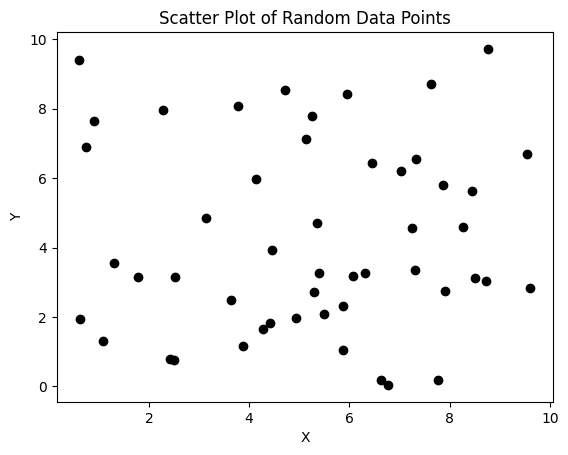

In [ ]:
#@title Generate some random data and Visualize it

# Generate some random data points
data_points = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(50)]

# create a scatter plot
x = [p[0] for p in data_points]
y = [p[1] for p in data_points]
plt.scatter(x, y, color = 'black')

# add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Random Data Points')

# show the plot
plt.show()


In [ ]:
#@title Apply K-Means Clustering

# Initialize the centroids randomly
centroids = random.sample(data_points, K)

# Main K-means algorithm
for i in range(max_iterations):
    # Initialize the clusters dictionary
    clusters = {j: [] for j in range(K)}

    # Assign each data point to the nearest centroid
    for point in data_points:
        distances = [((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2) ** 0.5 for centroid in centroids]
        nearest_centroid_index = distances.index(min(distances))
        clusters[nearest_centroid_index].append(point)

    # Update the centroids based on the mean of the assigned data points
    for j in range(K):
        if clusters[j]:
            centroids[j] = tuple(sum(coord) / len(coord) for coord in zip(*clusters[j]))

# Print the final centroids and their respective clusters
for j, centroid in enumerate(centroids):
    print(f"Centroid {j+1}: {centroid}")
    print(f"Cluster {j+1}: {clusters[j]}")
    print(f"Count of data points in the cluster {j+1}: {len(clusters[j])}\n")


Centroid 1: (3.9170314616266872, 2.103229962504813)
Cluster 1: [(1.772306718162815, 3.141428050075884), (3.87602585931191, 1.1698559350986915), (5.3039150940826385, 2.7135505010251935), (2.4911719222863637, 0.7751109401402656), (3.6362822198341305, 2.5029046590867923), (2.416548439286339, 0.7932193008143362), (4.926190071872908, 1.9589354126096736), (4.465798065474269, 3.92323921077581), (5.864497120012545, 1.038408841160836), (0.6196394871011457, 1.929896213920539), (5.4985923763557585, 2.078503417655473), (6.769074540891685, 0.04492481613896482), (5.8659881297234975, 2.3207462216364116), (6.627496962558444, 0.17636743904338337), (4.420533756606356, 1.8176209031909651), (1.297652262539496, 3.5511019657300302), (1.084515208173028, 1.2999790357819563), (4.2695467052973965, 1.6600060469154898), (3.134180474901105, 4.856029223891057), (5.400110353837858, 3.2612127702054994), (2.517594925850737, 3.154788307703824)]
Count of data points in the cluster 1: 21

Centroid 2: (4.15780334424629, 8

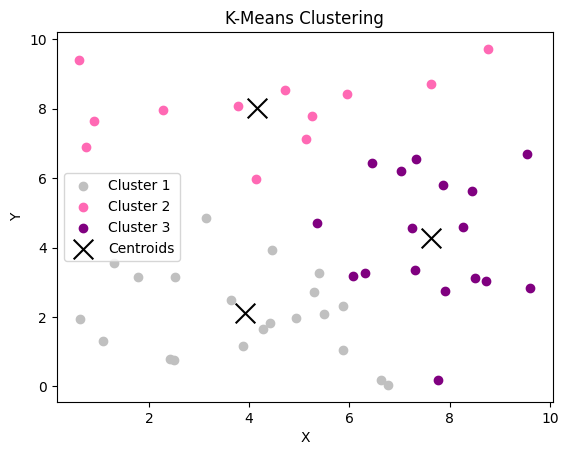

In [ ]:
#@title Plot the clusters and centroids (Basic)

# create a scatter plot with different colors for each cluster
colors = random_colors
for j, cluster in enumerate(clusters.values()):
    x = [p[0] for p in cluster]
    y = [p[1] for p in cluster]
    plt.scatter(x, y, c=colors[j], label=f"Cluster {j+1}")

# plot the final centroids
cx = [c[0] for c in centroids]
cy = [c[1] for c in centroids]
plt.scatter(cx, cy, marker='x', s=200, c='k', label='Centroids')

# add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')

# add legend
plt.legend()

# show the plot
plt.show()


Text(0.5, 1.0, 'K-Means Clustering')

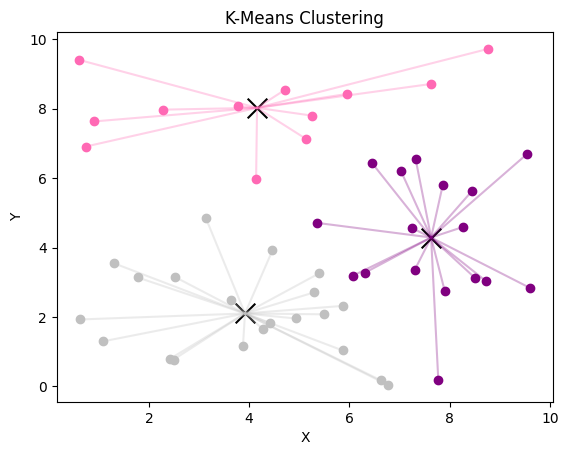

In [ ]:
#@title Plot the clusters and centroids (With Lines)
# create a scatter plot with different colors for each cluster
#colors = [plt.cm.tab10(i) for i in range(K)]

colors = [[random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)] for _ in range(K)]
colors = random_colors

for j, cluster in enumerate(clusters.values()):
    x = [p[0] for p in cluster]
    y = [p[1] for p in cluster]
    plt.scatter(x, y, c=colors[j], label=f"Cluster {j+1}")

    # plot lines between the data points in the cluster
    for point in cluster:
        plt.plot([point[0], centroids[j][0]], [point[1], centroids[j][1]], c=colors[j], alpha=0.3)

# plot the final centroids
cx = [c[0] for c in centroids]
cy = [c[1] for c in centroids]
plt.scatter(cx, cy, marker='x', s=200, c='k', label='Centroids')

# add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')


# K-Means Clustering (Basic Python) Using Functions

In [ ]:
#@title Create Helper Functions

def distance(point1, point2):
    """Calculate Euclidean distance between two points."""
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def assign_clusters(data_points, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = {j: [] for j in range(len(centroids))}
    for point in data_points:
        distances = [distance(point, centroid) for centroid in centroids]
        nearest_centroid_index = distances.index(min(distances))
        clusters[nearest_centroid_index].append(point)
    return clusters

def update_centroids(clusters):
    """Update the centroids based on the mean of the assigned data points."""
    centroids = []
    for cluster in clusters.values():
        if cluster:
            centroids.append(tuple(sum(coord) / len(coord) for coord in zip(*cluster)))
        else:
            # If a cluster is empty, reinitialize its centroid randomly
            centroids.append(random.choice(list(clusters.values()))[0])
    return centroids

def k_means_clustering(data_points, K, max_iterations):
    """Perform K-means clustering on the given data points."""
    # Initialize the centroids randomly
    centroids = random.sample(data_points, K)

    # Main K-means algorithm
    for i in range(max_iterations):
        clusters = assign_clusters(data_points, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break  # Stop iterating if the centroids no longer change
        centroids = new_centroids

    return clusters, centroids



def scatter_plot_data_points(data_points):
      """Shows the scatter plot of data points"""
      # create a scatter plot
      x = [p[0] for p in data_points]
      y = [p[1] for p in data_points]
      plt.scatter(x, y, color = 'black')

      # add labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Scatter Plot of Random Data Points')

      # show the plot
      plt.show()


def scatter_plot_points_and_centroids(clusters):
      """create a scatter plot with different colors for each cluster"""
      colors = [[random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)] for _ in range(K)]
      colors = random_colors
      for j, cluster in enumerate(clusters.values()):
          x = [p[0] for p in cluster]
          y = [p[1] for p in cluster]
          plt.scatter(x, y, c=colors[j], label=f"Cluster {j+1}")

      # plot the final centroids
      cx = [c[0] for c in centroids]
      cy = [c[1] for c in centroids]
      plt.scatter(cx, cy, marker='x', s=200, c='k', label='Centroids')

      # add labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('K-Means Clustering')

      # add legend
      plt.legend()

      # show the plot
      plt.show()


def scatter_and_line_plot_points_and_centroids(clusters):
      """create a scatter plot with different colors for each cluster and show the lines as well"""
      colors = [[random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)] for _ in range(K)]
      colors = random_colors

      for j, cluster in enumerate(clusters.values()):
          x = [p[0] for p in cluster]
          y = [p[1] for p in cluster]
          plt.scatter(x, y, c=colors[j], label=f"Cluster {j+1}")

          # plot lines between the data points in the cluster
          for point in cluster:
              plt.plot([point[0], centroids[j][0]], [point[1], centroids[j][1]], c=colors[j], alpha=0.3)

      # plot the final centroids
      cx = [c[0] for c in centroids]
      cy = [c[1] for c in centroids]
      plt.scatter(cx, cy, marker='x', s=200, c='k', label='Centroids')

      # add labels and title
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('K-Means Clustering')


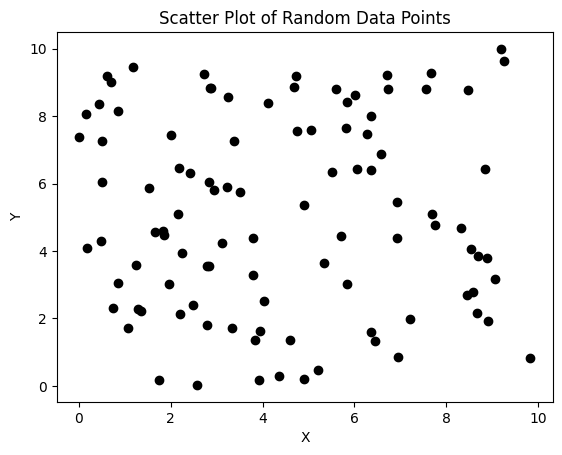

In [ ]:
#@title Generate some random data and visualize it
# Create the data
data_points = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(100)]

# Show the scatter plot
scatter_plot_data_points(data_points)

In [ ]:
#@title Apply K Means Clustering

# call the helper function
clusters, centroids = k_means_clustering(data_points, K=K, max_iterations=max_iterations)

# Print the final centroids and their respective clusters
for j, centroid in enumerate(centroids):
    print(f"Centroid {j+1}: {centroid}")
    print(f"Cluster {j+1}: {clusters[j]}\n")

Centroid 1: (7.6696313125150555, 3.16624692350844)
Cluster 1: [(8.876502767399781, 3.7835499888659054), (7.7642671858957115, 4.763786299925044), (9.058224966845854, 3.1808833760818542), (9.83050832052365, 0.8187699813778437), (5.701523404398657, 4.436968777960986), (6.92994740957782, 5.439239031314176), (8.679963626671647, 3.8514191247929697), (7.208495837926802, 1.9808165705812342), (8.578602243246289, 2.7882898342098814), (7.686761263233954, 5.093278687841671), (6.352279877682241, 1.5853014691994538), (6.9394279088973505, 0.8551205141253082), (5.33971916966899, 3.637115340442698), (6.921619160816375, 4.394176218590919), (8.677534192332992, 2.1741455656339594), (5.845545791071621, 3.0188787757326496), (8.329047092990287, 4.684310718118291), (8.540764046157015, 4.060163094442726), (6.444789377579097, 1.3197512094190267), (8.452195110331647, 2.7007022538821146), (8.904538809568367, 1.924518561138523)]

Centroid 2: (2.8535194022466244, 2.127858256641859)
Cluster 2: [(3.9419219553739717, 

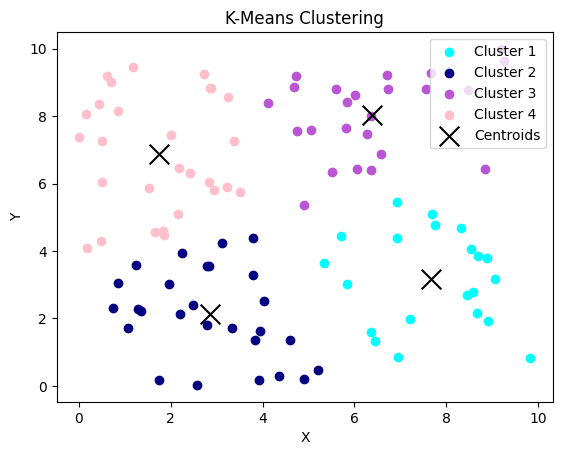

In [ ]:
#@title Plot the clusters and centroids
scatter_plot_points_and_centroids(clusters)

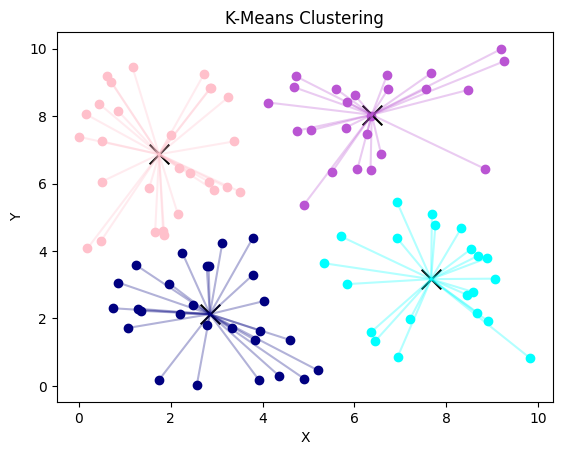

In [ ]:
#@title Plot the clusters and centroids (With Lines)
scatter_and_line_plot_points_and_centroids(clusters)

# K-means Clustering Using scikit-learn

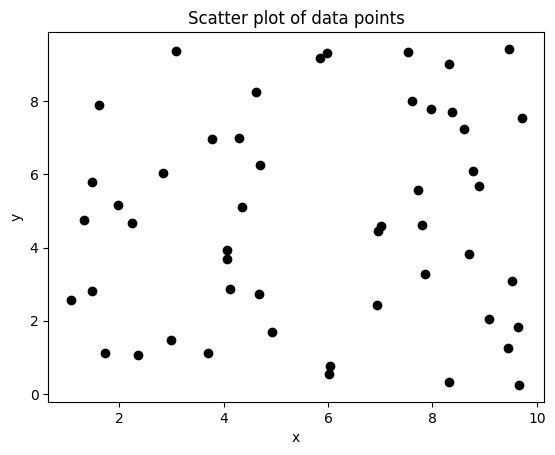

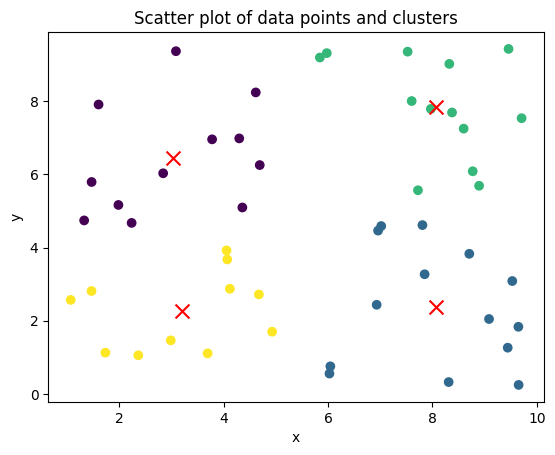

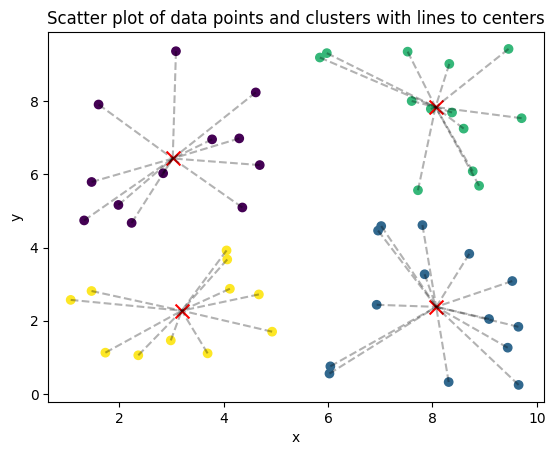

In [ ]:
#@title Using 50 random data points
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate some random data
data_points = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(50)]
X = np.array(data_points)

# Plot the scatter plot of the data points
plt.scatter(X[:,0], X[:,1], c='black')
plt.title('Scatter plot of data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Initialize the k-means clustering algorithm with K clusters
kmeans = KMeans(n_clusters=K, n_init = max_iterations)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter plot of the data points and clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
plt.title('Scatter plot of data points and clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the scatter plot of the data points and clusters with lines to centers
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
for i in range(X.shape[0]):
    plt.plot([X[i,0], centers[labels[i],0]], [X[i,1], centers[labels[i],1]], 'k--', alpha=0.3)
plt.title('Scatter plot of data points and clusters with lines to centers')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


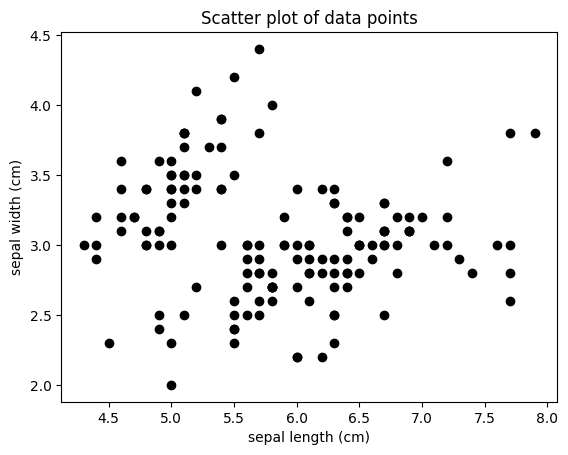

The centers are: 
[[6.85348837 3.1       ]
 [4.76666667 2.89166667]
 [5.1875     3.6375    ]
 [5.90980392 2.73529412]]
The labels are:  [2 1 1 1 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 0 0 0 3 0 3 0 1 0 1 1 3 3 3 3 0 3 3 3 3 3 3 3 3
 0 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 1 3 3 3 3 1 3 0 3 0 3 0 0 1 0 0 0 0
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
The number of data points in each cluster are: 
3    51
0    43
2    32
1    24
dtype: int64


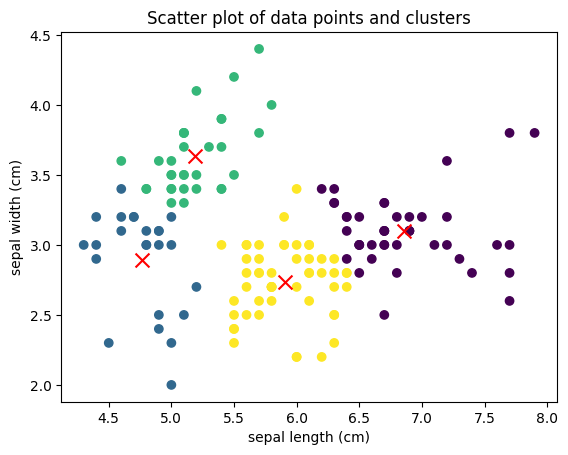

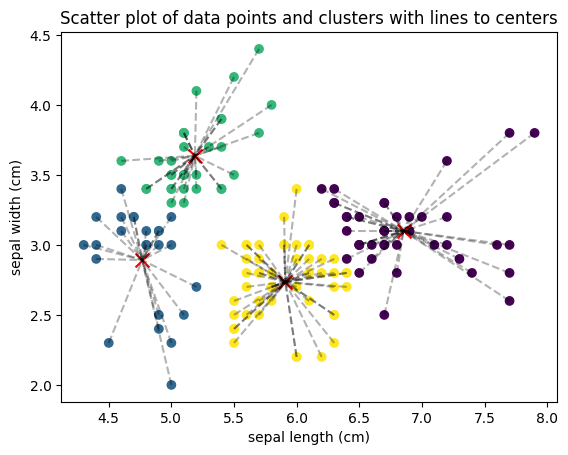

In [ ]:
#@title Using iris dataset
'''
iris: This is a classic dataset for machine learning and contains measurements of
the sepal length, sepal width, petal length, and petal width for 150 iris flowers,
divided evenly among three species. It can be used for clustering to try
and group the flowers based on their measurements.
'''

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target

# Plot the scatter plot of the data points
plt.scatter(X[:,0], X[:,1], c='black')
plt.title('Scatter plot of data points')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Initialize the k-means clustering algorithm with K clusters
kmeans = KMeans(n_clusters=K, n_init=max_iterations)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

y_pred = kmeans.fit_predict(X)

# Print the cluster centers and the number of points in each cluster
print('The centers are: ')
print(centers)
print('The labels are: ', labels)


value_counts = pd.Series(labels).value_counts()
print('The number of data points in each cluster are: ')
print(value_counts)


# Plot the scatter plot of the data points and clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
plt.title('Scatter plot of data points and clusters')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Plot the scatter plot of the data points and clusters with lines to centers
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
for i in range(X.shape[0]):
    plt.plot([X[i,0], centers[labels[i],0]], [X[i,1], centers[labels[i],1]], 'k--', alpha=0.3)
plt.title('Scatter plot of data points and clusters with lines to centers')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


# Performance Measures of Clustering Model

Within-Cluster Sum of Squares (WSS): 27.96637904586593


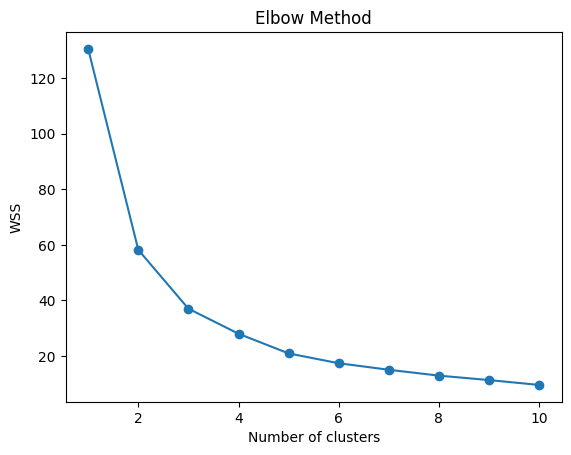

In [ ]:
#@title Within-Cluster Sum of Squares (WSS)
wss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WSS):", wss)

wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()



Silhouette Score: 0.4248889536419921


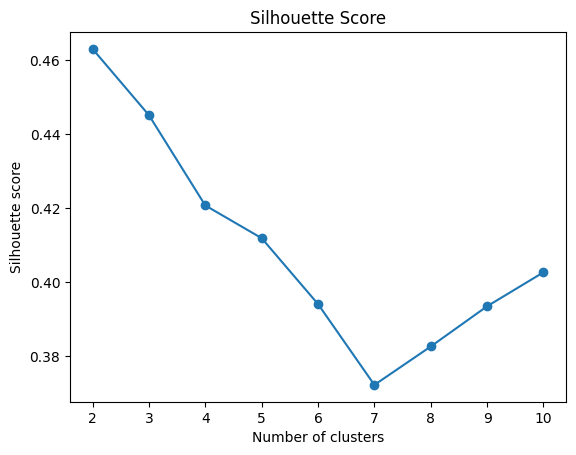

In [ ]:
#@title Silhouete Score

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()




Davies-Bouldin Index: 0.7702610372538152


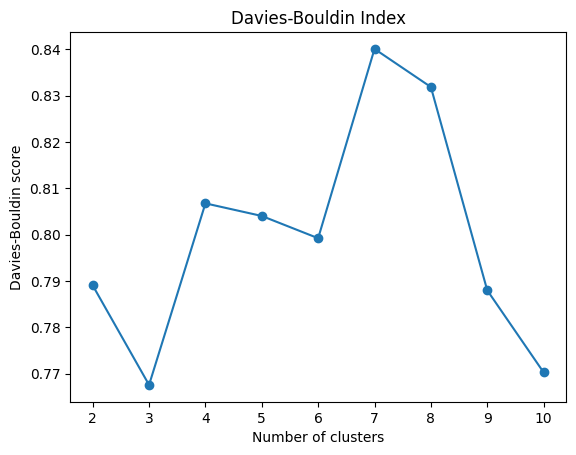

In [ ]:
#@title Davies Bouldin Score

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)

db_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    db_scores.append(davies_bouldin_score(X, labels))
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.show()


Calinski-Harabasz Index: 195.3747374246806


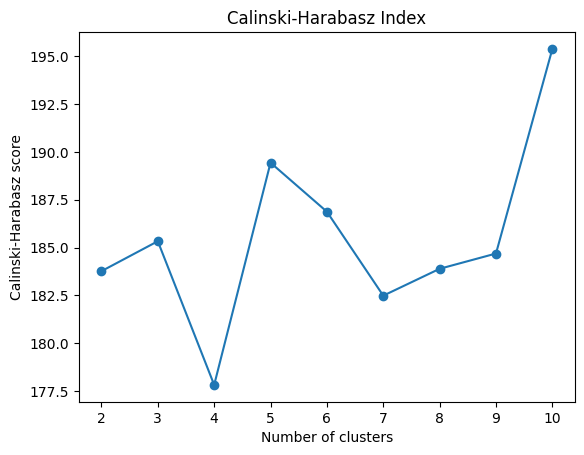

In [ ]:
#@title Calinski Harabasz Score

from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

ch_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_scores.append(calinski_harabasz_score(X, labels))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz score')
plt.show()


# K-Means Clustering (iris dataset)

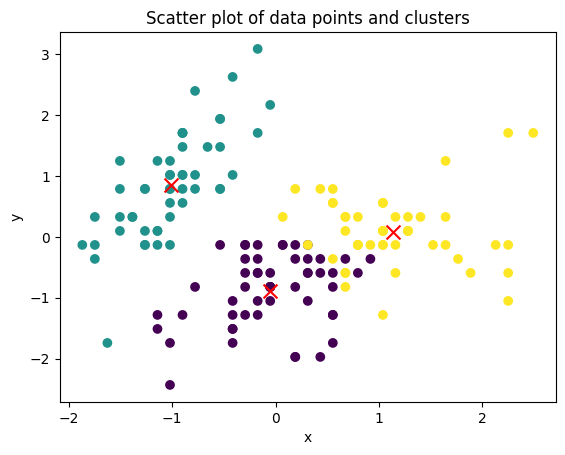

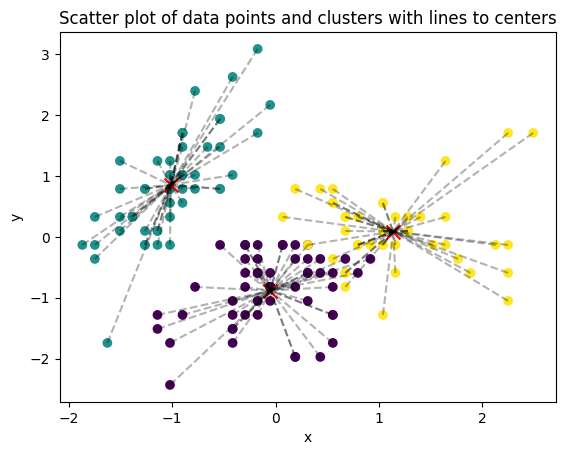

In [ ]:
#@title K-means clustering of iris dataset
#@title Using 50 random data points
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

# Standardize the dataset
X = StandardScaler().fit_transform(iris.data)

# Initialize the k-means clustering algorithm with K clusters
kmeans = KMeans(n_clusters=K, n_init = max_iterations)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Plot the scatter plot of the data points and clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
plt.title('Scatter plot of data points and clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the scatter plot of the data points and clusters with lines to centers
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='r', s=100)
for i in range(X.shape[0]):
    plt.plot([X[i,0], centers[labels[i],0]], [X[i,1], centers[labels[i],1]], 'k--', alpha=0.3)
plt.title('Scatter plot of data points and clusters with lines to centers')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


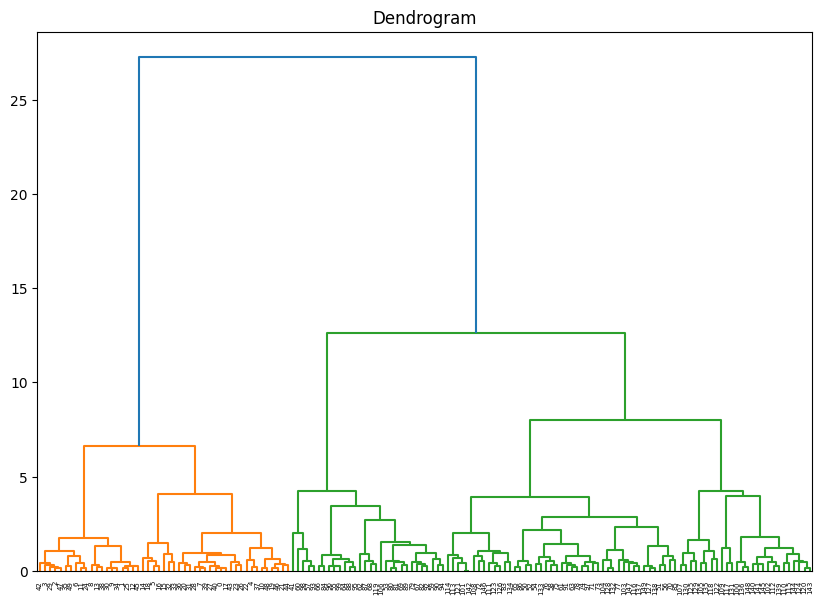

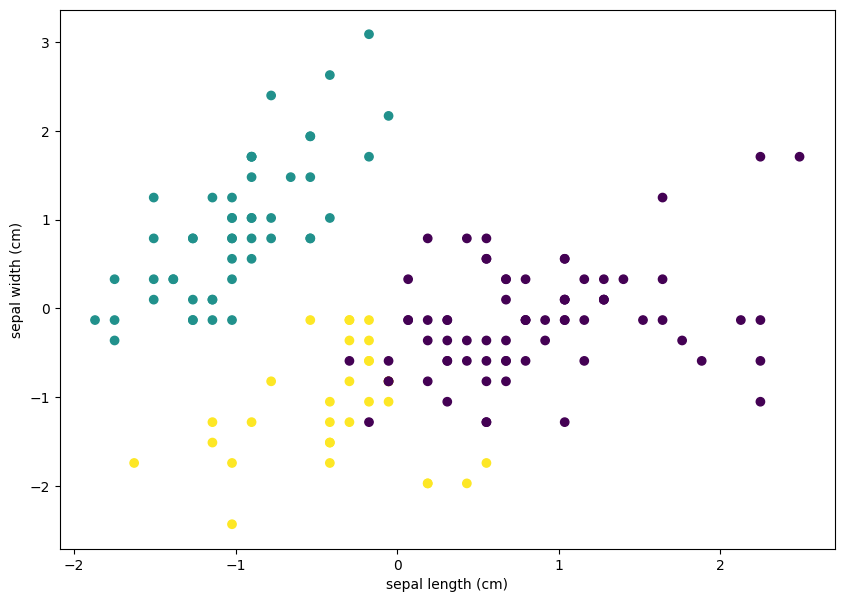

In [ ]:
#@title Agglomerative Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()

# Standardize the dataset
X = StandardScaler().fit_transform(iris.data)

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(X, method='ward'))

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
